In [186]:
# Importing dependencies:
import cv2
import glob
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Imported all dependencies!')

Imported all dependencies!


This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


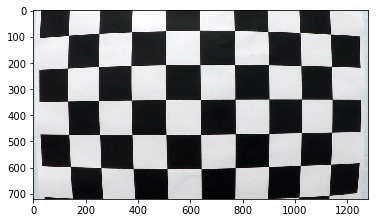

In [192]:
# Opening and reading an image (one provided by Udacity):
image = cv2.imread('camera_cal/calibration1.jpg')

# Importing several images for testing:
images = glob.glob('camera_cal/*.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [5]:
# Setting image size:
# Number of inside corners in X:
nx = 9
# Number of inside corners in Y:
ny = 6

# Creating object points:
# Array that will hold 3D points of the real world:
objpoints = []

# Array that will hold 2D in the image plane:
imagepoints = []

# Preparing the object points:
objp = np.zeros((6 * 9, 3), np.float32)

# Reshaping the coordinates given from ngrid to 2 columns X & Y:
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

print('Done setting the arrays and image size!')

Done setting the arrays and image size!


In [6]:
# Creating function that find the points in the images:
def find_points(img, objpoints, imagepoints):
    
    # Iterating through the images found in the folder:
    for idx, fname in enumerate(images):
        
        # Saving the images into an empty variable:
        img = cv2.imread(fname)
    
        # Grayscaling images from color to gray:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Looking for chess board corners:
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # Drawing detected corners of. the image:
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

        # If the function finds corners:
        if ret == True:

            # Appending the corners and the object points to the empty arrays created before:
            imagepoints.append(corners)
            objpoints.append(objp)

            # Drawing corners on the chessboard:
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
    return img

print('Function is ready to use!')

Function is ready to use!


Image saved in directory!


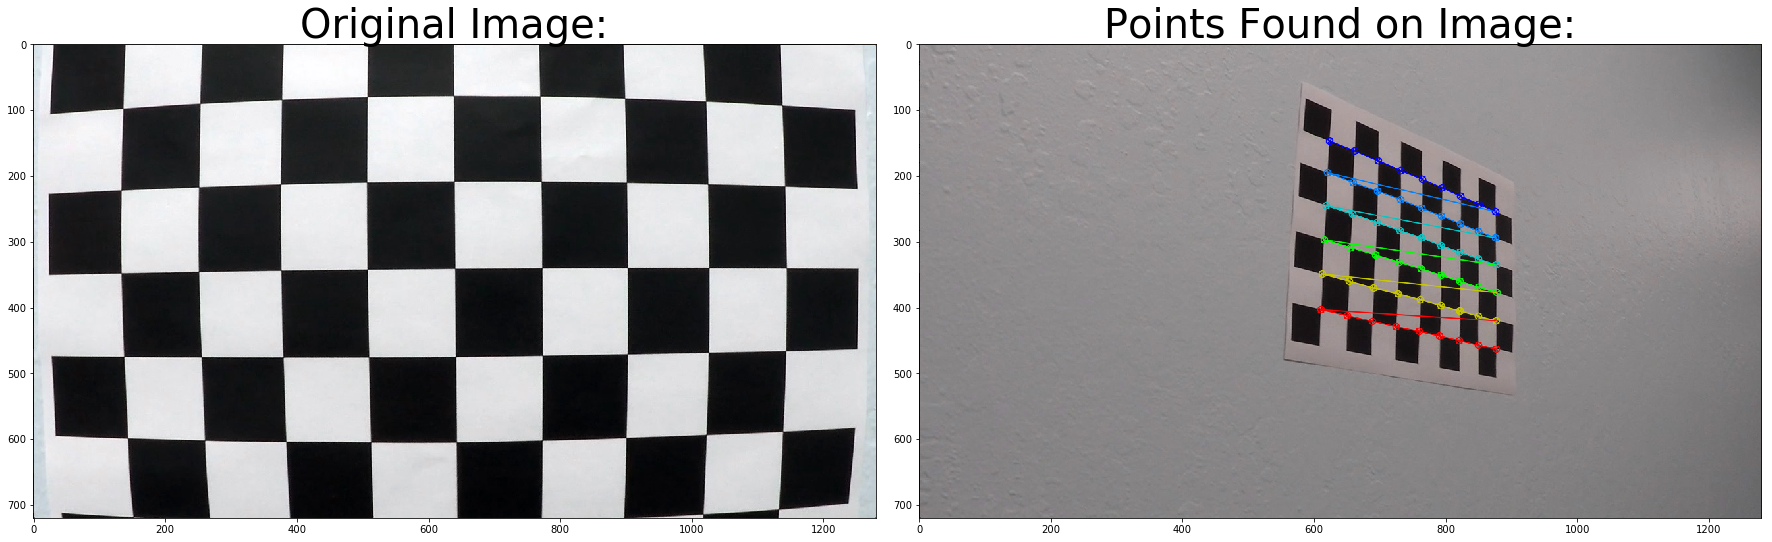

In [7]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original image before passing it through the function:
ax1.imshow(image)
ax1.set_title('Original Image:', fontsize=40)

# Saving the found points image in a variable and folder:
image_points = find_points(image, objpoints, imagepoints)
plt.imsave('output_images/image_points.jpg', image_points)
print('Image saved in directory!')

# Showing the founds points image after passing it through the function:
ax2.imshow(image_points)
ax2.set_title('Points Found on Image:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [151]:
# Calibrating and undistorting the images:
def undistort_img(img):

    # Test undistortion on an image:
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imagepoints, img_size, None, None)

    # Creating the destination of the undistorted image:
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs):
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump(dist_pickle, open("camera_cal/wide_dist_pickle.p", "wb"))
    
    return dst

print('Function ready to use!')

Function ready to use!


Image saved in directory!


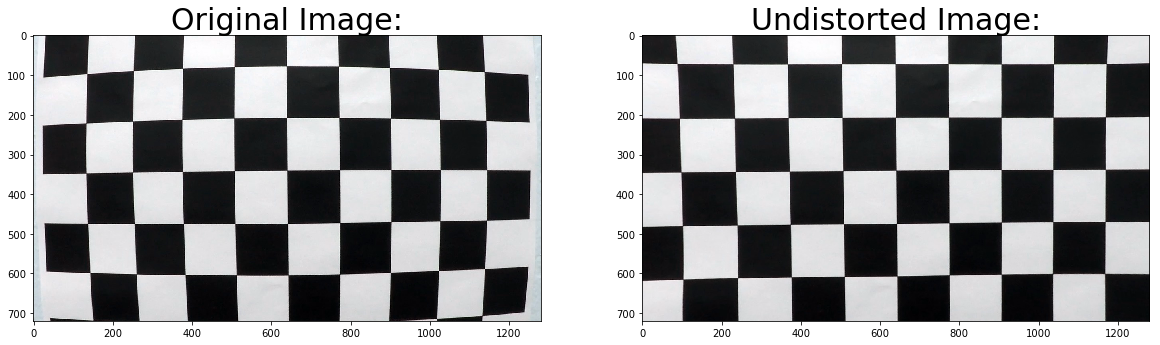

In [152]:
# Showing the original image before passing it through the function:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image:', fontsize=30)

# Saving the undistorted image in a variable and folder:
undistort_image = undistort_img(image)
plt.imsave('output_images/undistort_image.jpg', undistort_image)
print('Image saved in directory!')

# Showing the undistorted image after passing it through the function:
ax2.imshow(undistort_image)
ax2.set_title('Undistorted Image:', fontsize=30)

In [47]:
# Creating a function that applies Sobel:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Taking the absolute value of the derivative of the gradients.
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # Scaling the image to 8-bit (0-255) and converting to np.uint8
    scaled_model = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(scaled_model)
    sxbinary[(scaled_model >= thresh_min) & (scaled_model <= thresh_max)] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    
    return binary_output

print('Function ready to use!')

Function ready to use!


Image saved in directory!


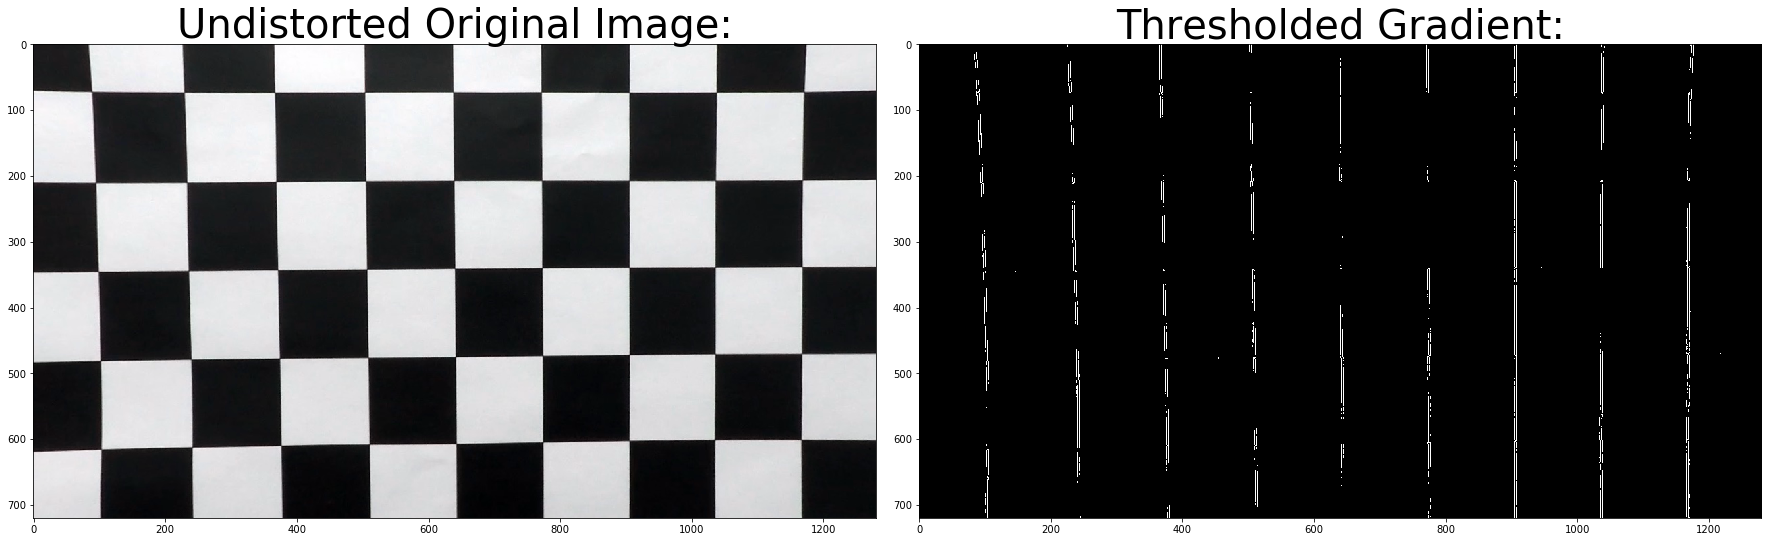

In [48]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original undistorted image before passing it through the function:
ax1.imshow(undistort_image)
ax1.set_title('Undistorted Original Image:', fontsize=40)

# Saving the thresholded gradient in a variable and folder:
thresholded_image = abs_sobel_thresh(undistort_image, orient='x', sobel_kernel=3, thresh_min=20, thresh_max=100)
plt.imsave('output_images/thresholded_image.jpg', thresholded_image)
print('Image saved in directory!')

# Showing the thresholded gradient after passing it through the function:
ax2.imshow(thresholded_image, cmap='gray')
ax2.set_title('Thresholded Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


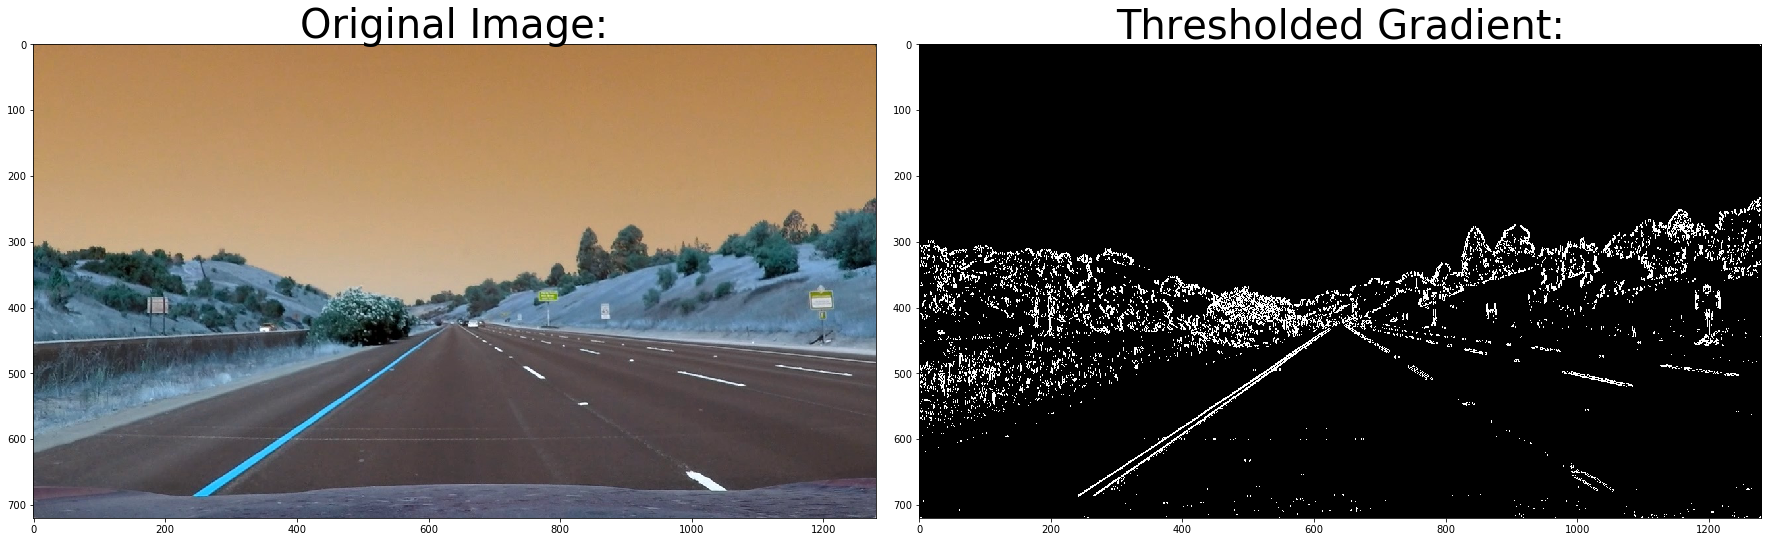

In [49]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

highway_test1 = cv2.imread('test_images/straight_lines1.jpg')

# Displaying threshold gradient in highway:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the thresholded gradient in a variable and folder:
highway_threshold_test1 = abs_sobel_thresh(highway_test1, orient='x', sobel_kernel=3, thresh_min=20, thresh_max=100)
plt.imsave('output_images/highway_threshold_test1.jpg', highway_threshold_test1)
print('Image saved in directory!')

# Showing the thresholded gradient after passing it through the function:
ax2.imshow(highway_threshold_test1, cmap='gray')
ax2.set_title('Thresholded Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [25]:
# Creating function that applies Magnitude of Gradient:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculating the magnitude:
    abs_sobelx = np.sqrt(sobelx**2 + sobely**2)
    
    # Scaling the image to 8-bit (0-255) and converting to np.uint8
    scaled_model = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(scaled_model)
    sxbinary[(scaled_model > mag_thresh[0]) & (scaled_model < mag_thresh[1])] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    return binary_output
    
print('Function ready to use!')

Function ready to use!


Image saved in directory!


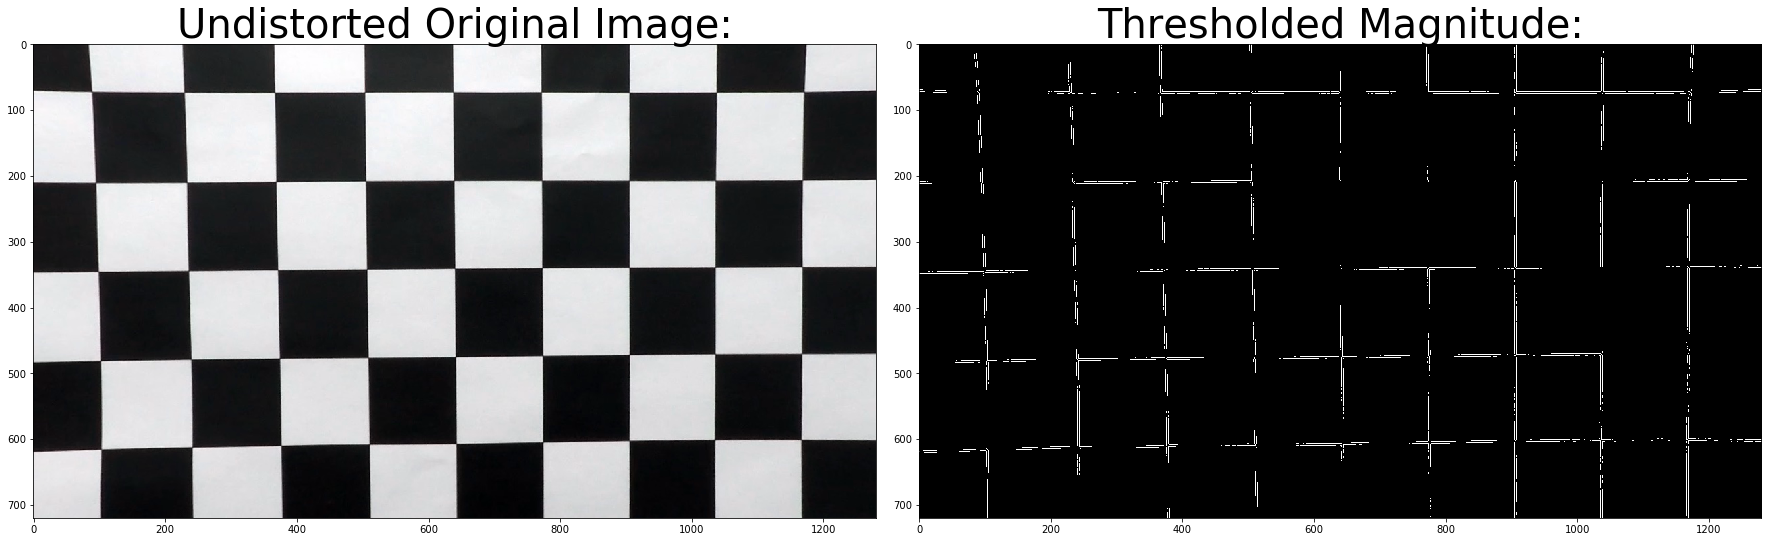

In [26]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original undistorted image before passing it through the function:
ax1.imshow(undistort_image)
ax1.set_title('Undistorted Original Image:', fontsize=40)

# Saving the thresholded magnitude in a variable and folder:
magnitude_image = mag_thresh(undistort_image, sobel_kernel=3, mag_thresh=(30, 100))
plt.imsave('output_images/magnitude_image.jpg', magnitude_image)
print('Image saved in directory!')

# Showing the thresholded magnitude after passing it through the function:
ax2.imshow(magnitude_image, cmap='gray')
ax2.set_title('Thresholded Magnitude:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


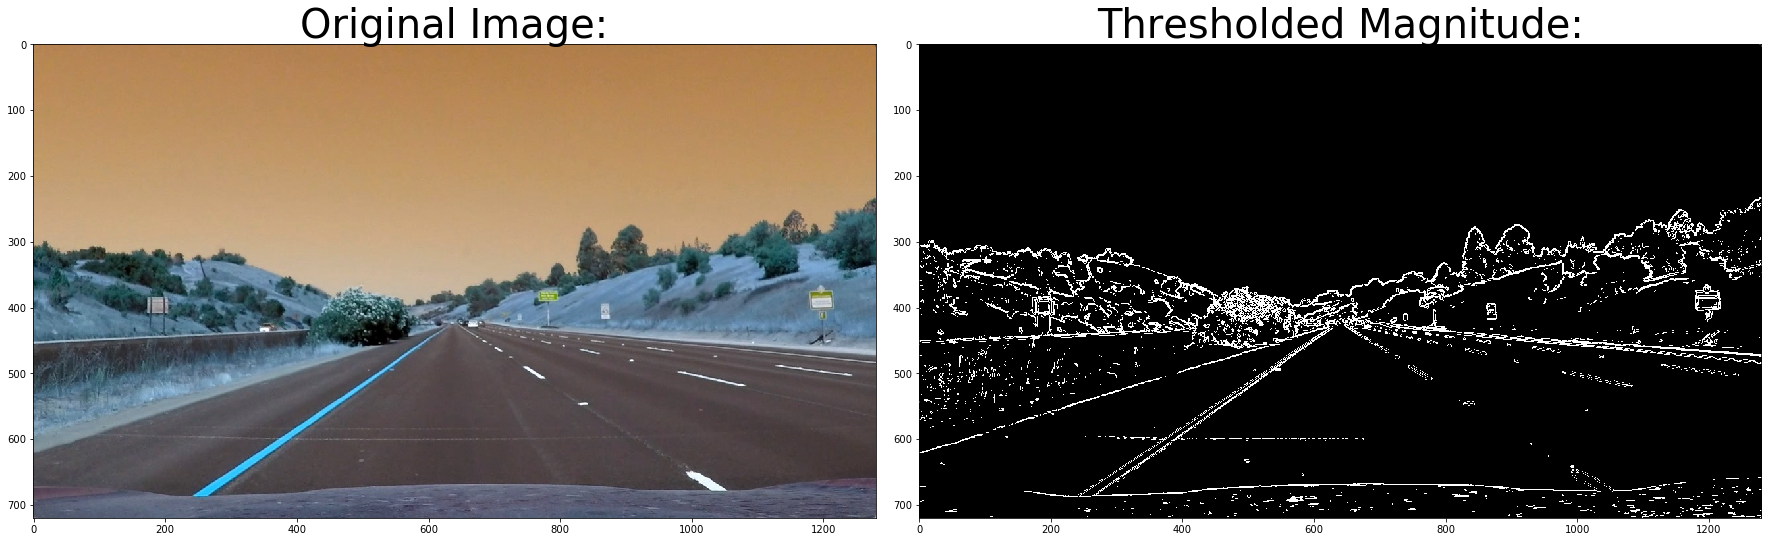

In [161]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying threshold gradient in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the magnitude thresholded in a variable and folder:
highway_magnitude_test1 = mag_thresh(highway_test1, sobel_kernel=3, mag_thresh=(30, 100))
plt.imsave('output_images/highway_magnitude_test1.jpg', highway_magnitude_test1)
print('Image saved in directory!')

# Showing the magnitude thresholded after passing it through the function:
ax2.imshow(highway_magnitude_test1, cmap='gray')
ax2.set_title('Thresholded Magnitude:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [34]:
# Creating the function direction of the gradient:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Converting image to grayscale:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Taking the derivate of X & Y:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Getting the absolute value of X & Y:
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # Calculating the direction of gradient:
    abs_gradient = np.arctan2(abs_sobely, abs_sobely)
    
    # Creating a mask of 1s where the scaled gradient magnitude number is < thresh min and > the thresh max:
    sxbinary = np.zeros_like(abs_gradient)
    sxbinary[(abs_gradient > thresh[0]) & (abs_gradient < thresh[1])] = 1
    
    # Creating variable to save sxbinary:
    binary_output = sxbinary
    return binary_output
    
print('Function ready to use!')

Function ready to use!


Image saved in directory!


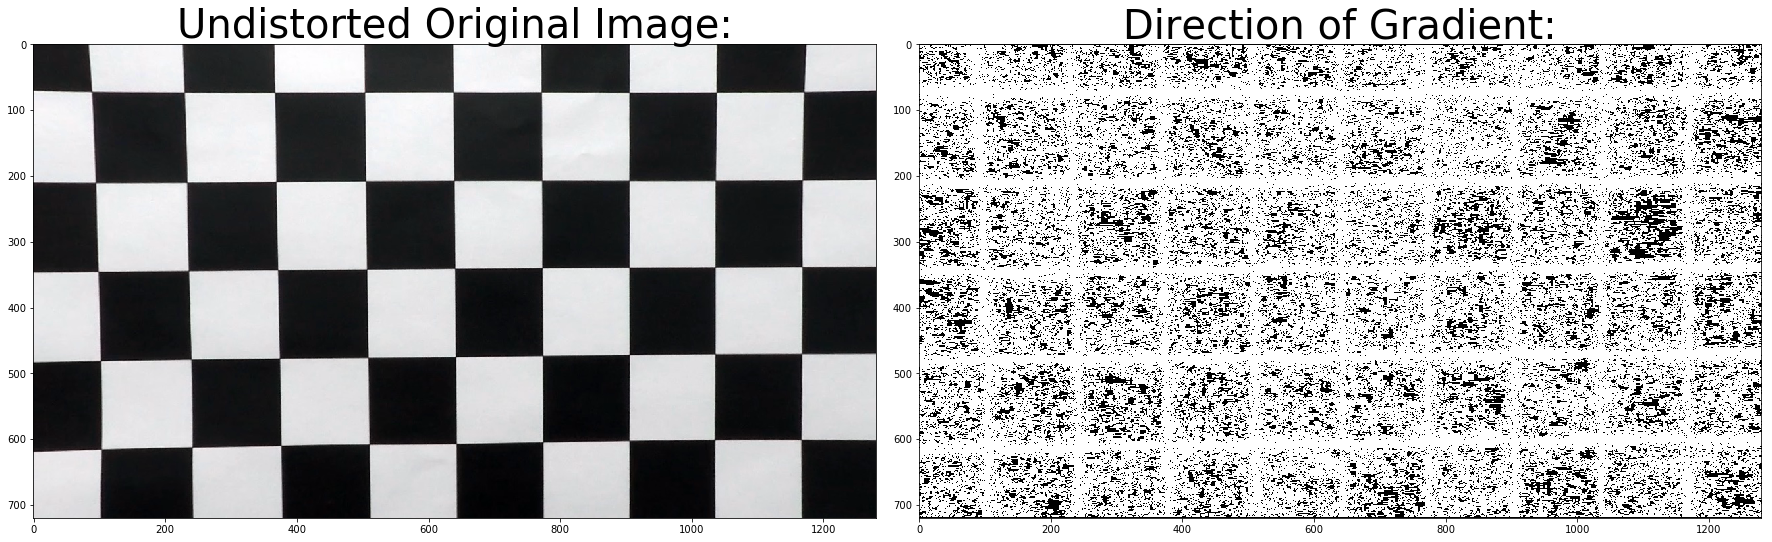

In [36]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original undistorted image before passing it through the function:
ax1.imshow(undistort_image)
ax1.set_title('Undistorted Original Image:', fontsize=40)

# Saving the direction of gradient in a variable and folder:
dir_gradient_image = dir_threshold(undistort_image, sobel_kernel=15, thresh=(0.7, 1.3))
plt.imsave('output_images/dir_gradient_image.jpg', dir_gradient_image)
print('Image saved in directory!')

# Showing the direction of gradient after passing it through the function:
ax2.imshow(dir_gradient_image, cmap='gray')
ax2.set_title('Direction of Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


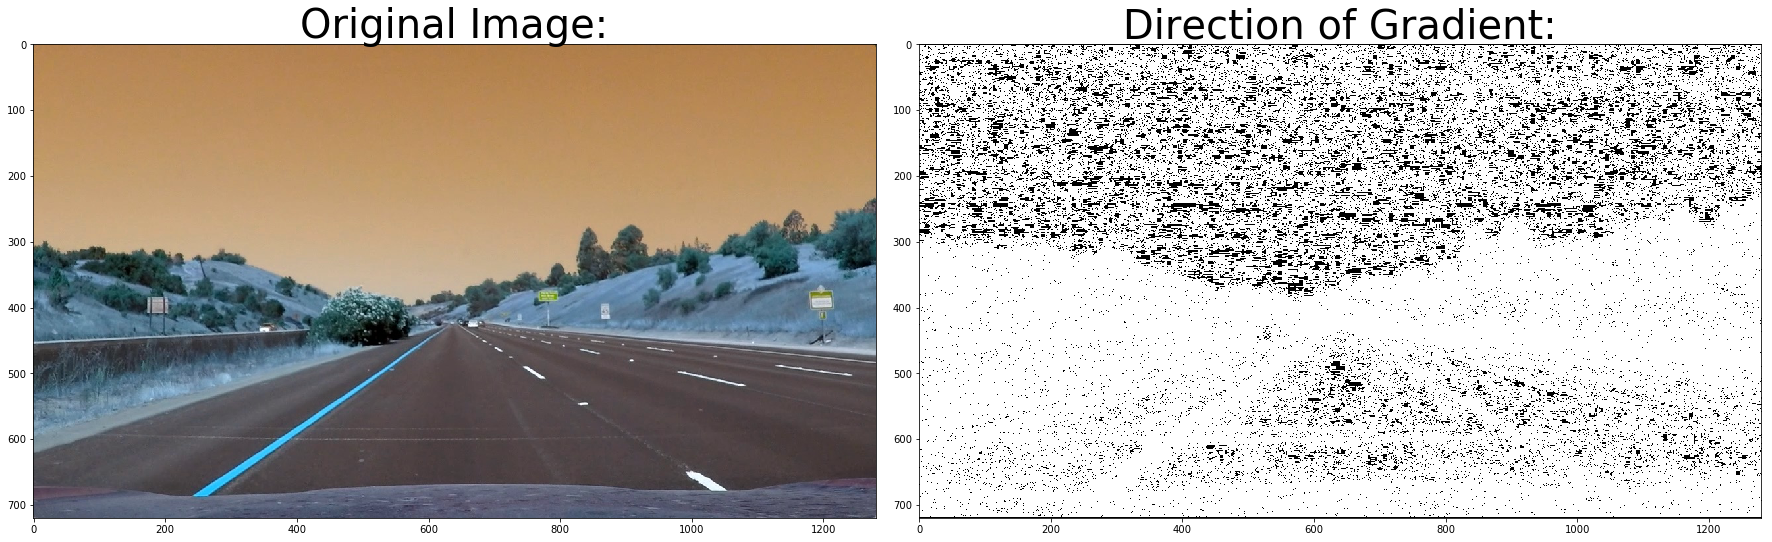

In [55]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying direction of gradient in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the direction of gradient in a variable and folder:
highway_direction_gradient_test1 = dir_threshold(highway_test1, sobel_kernel=15, thresh=(0.7, 1.3))
plt.imsave('output_images/highway_direction_gradient_test1.jpg', highway_direction_gradient_test1)
print('Image saved in directory!')

# Showing the direction of gradient after passing it through the function:
ax2.imshow(highway_magnitude_test1, cmap='gray')
ax2.set_title('Direction of Gradient:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [121]:
# Combining abs_sobel_thresh, mag_thresh & dir_threshold functions:
# Choosing a Sobel kernel size:
ksize = 7

# Applying each of the threshold functions:
gradx = abs_sobel_thresh(highway_test1, orient='x', sobel_kernel=ksize, thresh_min=20, thresh_max=100)
grady = abs_sobel_thresh(highway_test1, orient='y', sobel_kernel=ksize, thresh_min=20, thresh_max=100)
mag_binary = mag_thresh(highway_test1, sobel_kernel=ksize, mag_thresh=(170, 255))
dir_binary = dir_threshold(highway_test1, sobel_kernel=ksize, thresh=(0, np.pi/2))

# Combining the actual functions:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

print('Functions combined!')

Functions combined!


Image saved in directory!


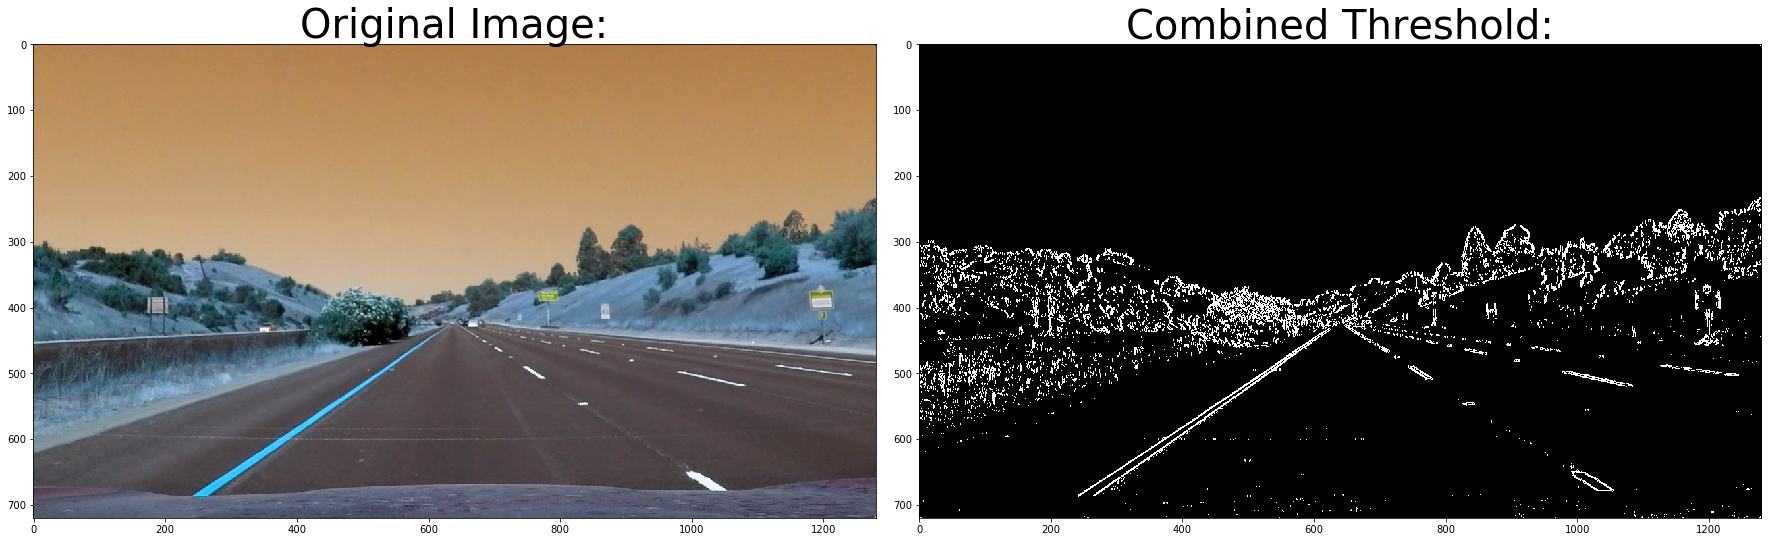

In [122]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying combined threshold in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the combined thresholded and saving in a variable and folder:
plt.imsave('output_images/highway_combined_test1.jpg', highway_combined_test1)
print('Image saved in directory!')

# Showing the combined thresholded after passing it through the function:
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined Threshold:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [129]:
# Creating HLS function:
def hls_select(img, thresh=(0, 255)):

    # Converting the images to HLS:
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # Seperating the 3 different channels:
    H = hls[:, :, 0]
    L = hls[:, :, 1]
    S = hls[:, :, 2]
    
    # Applying threshold to the channels:
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    binary_output = binary
    return binary_output

print('Function is ready to use!')

Function is ready to use!


Image saved in directory!


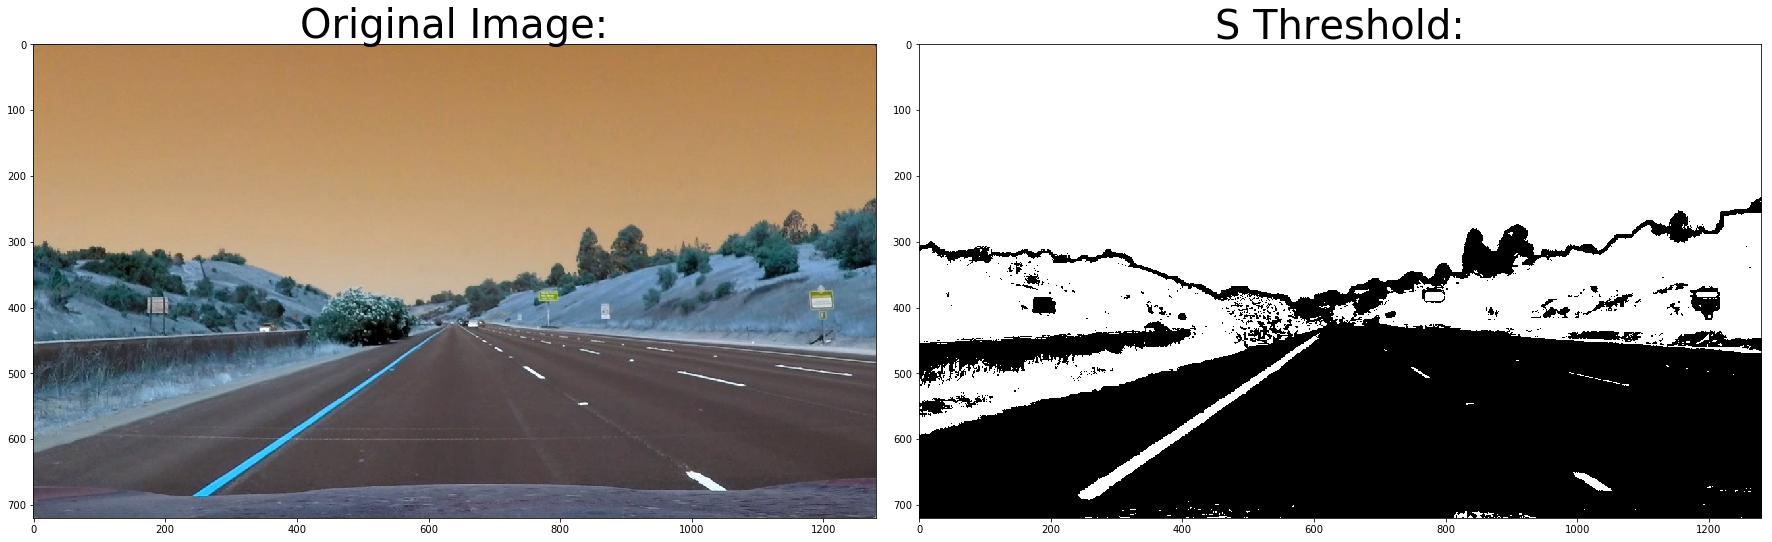

In [170]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying S threshold in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the S thresholded and saving in a variable and folder:
highway_S_channel_test1 = hls_select(highway_test1, thresh=(50, 255))
plt.imsave('output_images/highway_S_channel_test1.jpg', highway_S_channel_test1)
print('Image saved in directory!')

# Showing the S thresholded after passing it through the function:
ax2.imshow(highway_S_channel_test1, cmap='gray')
ax2.set_title('S Threshold:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Image saved in directory!


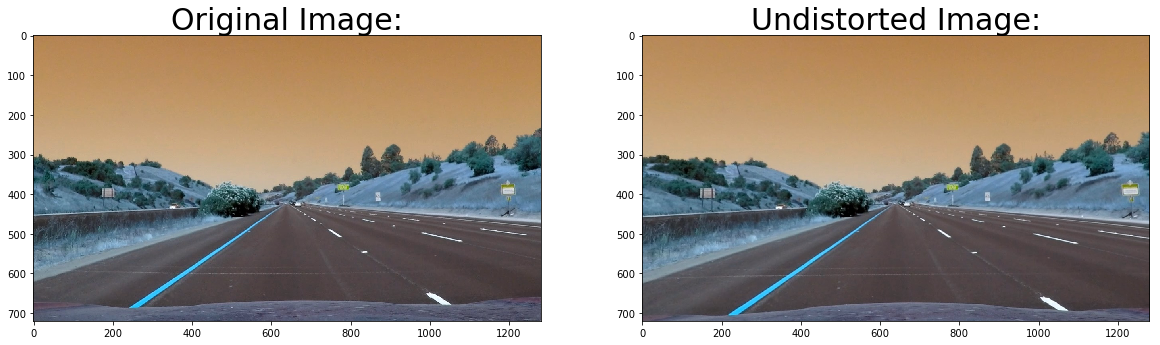

In [195]:
# Showing the original image before passing it through the function:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=30)

# Saving the undistorted highway image in a variable and folder:
highway_undistort_test1 = undistort_img(highway_test1)
plt.imsave('output_images/highway_undistort_test1.jpg', highway_undistort_test1)
print('Image saved in directory!')

# Showing the undistorted image after passing it through the function:
ax2.imshow(highway_undistort_test1)
ax2.set_title('Undistorted Image:', fontsize=30)

Image saved in directory!


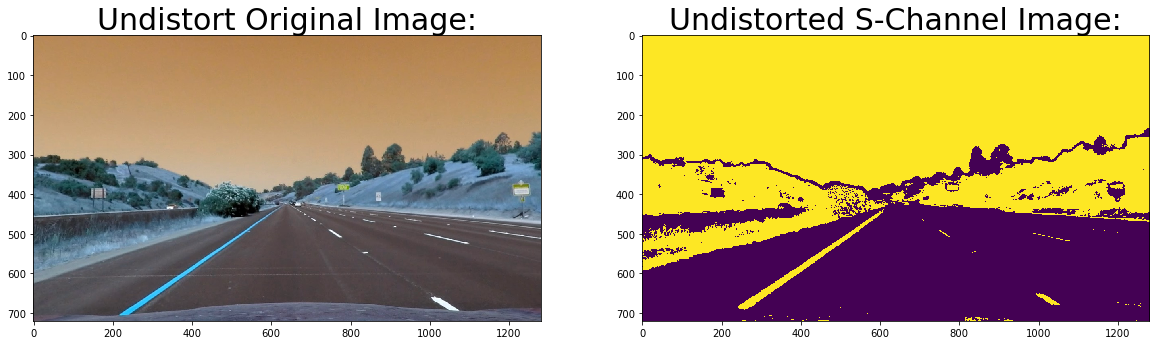

In [200]:
# Showing the original image before passing it through the function:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(highway_undistort_test1)
ax1.set_title('Undistort Original Image:', fontsize=30)

# Saving the undistorted highway image in a variable and folder:
highway_S_channel_undistort_test1 = hls_select(highway_test1, thresh=(50, 255))
plt.imsave('output_images/highway_S_channel_undistort_test1.jpg', highway_S_channel_undistort_test1)
print('Image saved in directory!')

# Showing the undistorted image after passing it through the function:
ax2.imshow(highway_S_channel_undistort_test1)
ax2.set_title('Undistorted S-Channel Image:', fontsize=30)

Image saved in directory!
Image saved in directory!


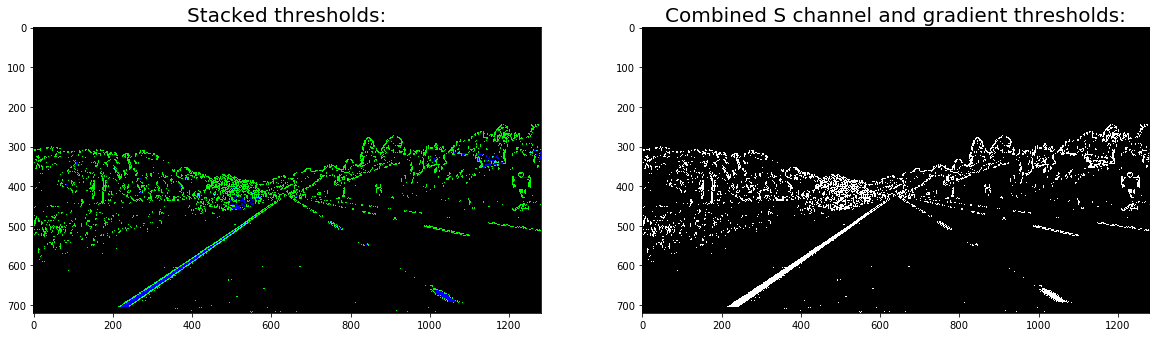

In [203]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(highway_undistort_test1, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(highway_undistort_test1, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
plt.imsave('output_images/highway_stacked_threshold_test1.jpg', color_binary)
print('Image saved in directory!')

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
plt.imsave('output_images/highway_combined_S_and_thresholds_test1.jpg', combined_binary)
print('Image saved in directory!')

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds:', fontsize=20)
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds:', fontsize=20)
ax2.imshow(combined_binary, cmap='gray')

In [233]:
# Setting the source points:
top_left = [570,470]
top_right = [720,470]
bottom_right = [1130,720]
bottom_left = [200,720]

# Calling the source points in an array:
src = np.float32([[top_left], [top_right], [bottom_left], [bottom_right]])

# Setting the destination points:
top_left_dst = [320,0]
top_right_dst = [960,0]
bottom_right_dst = [960,720]
bottom_left_dst = [320,720]

# Placing the destination points in an array:
dst = np.float32([[top_left_dst], [top_right_dst], [bottom_left_dst], [bottom_right_dst]])

print('Source and destination points set up!')

Source and destination points set up!


In [234]:
# Creating function that gives a birds eye view of image:
def birds_eye_view(img):
    
    # Grabbing the size of the image:
    img_size = (img.shape[1], img.shape[0])
    
    # Calculating the perspective transform given the source and destination points:
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Warping the image using the warpPerspective function:
    warped = cv2.warpPerspective(img, M, img_size)

    return warped

print('Function ready to use!')

Function ready to use!


Image saved in directory!


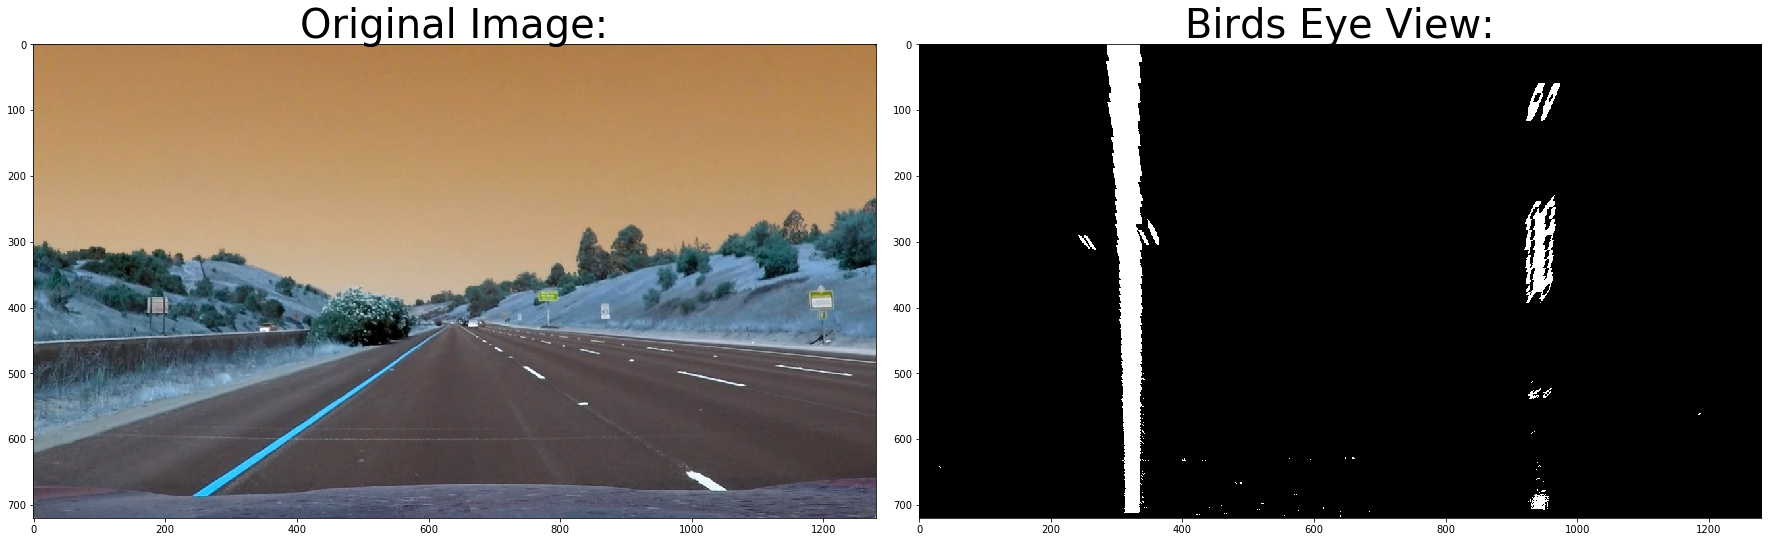

In [235]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying birds eye view in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the birds eye view image in a variable and folder:
highway_birds_eye_view_test1 = birds_eye_view(combined_binary)
plt.imsave('output_images/highway_birds_eye_view_test1.jpg', highway_birds_eye_view_test1)
print('Image saved in directory!')

# Showing the birds eye view image after passing it through the function:
ax2.imshow(highway_birds_eye_view_test1, cmap='gray')
ax2.set_title('Birds Eye View:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Histogram of lanes found from birds eye view:


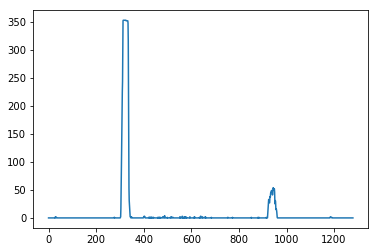

In [217]:
# Plotting histogram to show the lanes:
histogram = np.sum(highway_birds_eye_view_test1[highway_birds_eye_view_test1.shape[0]//2:, :], axis=0)
print('Histogram of lanes found from birds eye view:')
plt.plot(histogram)

In [219]:
# Create an output image to draw on and visualize the result:
out_img = np.dstack((highway_birds_eye_view_test1, highway_birds_eye_view_test1, highway_birds_eye_view_test1))*255

# Find the peak of the left and right halves of the histogram:
# These will be the starting point for the left and right lines:
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choosing the number of sliding windows:
nwindows = 9

# Setting height of windows:
window_height = np.int(highway_birds_eye_view_test1.shape[0]/nwindows)

# Identifying the X and Y positions of all nonzero pixels in the image
nonzero = highway_birds_eye_view_test1.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated for each window:
leftx_current = leftx_base
rightx_current = rightx_base

# Setting the width of the windows +/- margin:
margin = 100

# Setting minimum number of pixels found to recenter window:
minpix = 50

# Creating empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Stepping through the windows one by one:
for window in range(nwindows):
    
    # Identifying window boundaries in X and Y (and right and left):
    win_y_low = highway_birds_eye_view_test1.shape[0] - (window+1)*window_height
    win_y_high = highway_birds_eye_view_test1.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    
    # Drawing the windows on the visualization image:
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high), (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high), (0,255,0), 2)
    
    # Identifying the nonzero pixels in X and Y within the window:
    good_left_inds = ((nonzeroy >= win_y_low) & 
                      (nonzeroy < win_y_high) & 
                      (nonzerox >= win_xleft_low) & 
                      (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & 
                       (nonzeroy < win_y_high) & 
                       (nonzerox >= win_xright_low) & 
                       (nonzerox < win_xright_high)).nonzero()[0]
    
    # Appendding these indices to the lists:
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    # If found > minpix pixels, recenter next window on their mean position:
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenating the arrays of indices:
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extracting left and right line pixel positions:
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fitting a second order polynomial to each:
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print('Finished implementing of sliding windows!')

Finished implementing of sliding windows!


(720, 0)

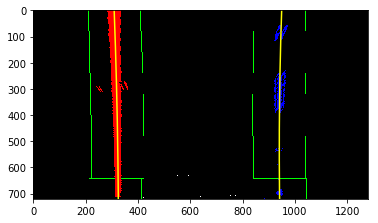

In [221]:
# Plotting and visualizing the sliding windows:
# Generate x and y values for plotting:
ploty = np.linspace(0, highway_birds_eye_view_test1.shape[0]-1, highway_birds_eye_view_test1.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plotting image:
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [228]:
# Defining conversions in X and Y from pixels space to meters:
# Meters per pixel in y dimension:
ym_per_pix = 30/720

# Meters per pixel in x dimension:
xm_per_pix = 3.7/700

# Fitting new polynomials to X, Y in world space:
left_fit_cr = np.polyfit(lefty * ym_per_pix, leftx * xm_per_pix, 2)
right_fit_cr = np.polyfit(righty * ym_per_pix, rightx * xm_per_pix, 2)

# Calculate the new radii of curvature:
left_curverad = ((1 + (2 * left_fit_cr[0] * 720 * ym_per_pix + left_fit_cr[1])**2) **1.5) / np.absolute(2 * left_fit_cr[0])
right_curverad = ((1 + (2 * right_fit_cr[0] * 720 * ym_per_pix + right_fit_cr[1])**2) **1.5) / np.absolute(2 * right_fit_cr[0])

# Now our radius of curvature is in meters:
print('Left Curverad:', left_curverad, 'meters') 
print('Right Curverad:', right_curverad, 'meters')

Left Curverad: 7662.24815485 meters
Right Curverad: 5013.60197088 meters


In [239]:
# Create an image to draw the lines on:
warp_zero = np.zeros_like(highway_birds_eye_view_test1).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly():
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image:
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv):
Minv = cv2.getPerspectiveTransform(dst, src)
newwarp = cv2.warpPerspective(color_warp, Minv, (highway_test1.shape[1], highway_test1.shape[0])) 

# Combine the result with the original image:
result = cv2.addWeighted(highway_undistort_test1, 1, newwarp, 0.3, 0)

print('Shades drawn!')

Shades drawn!


Image saved in directory!


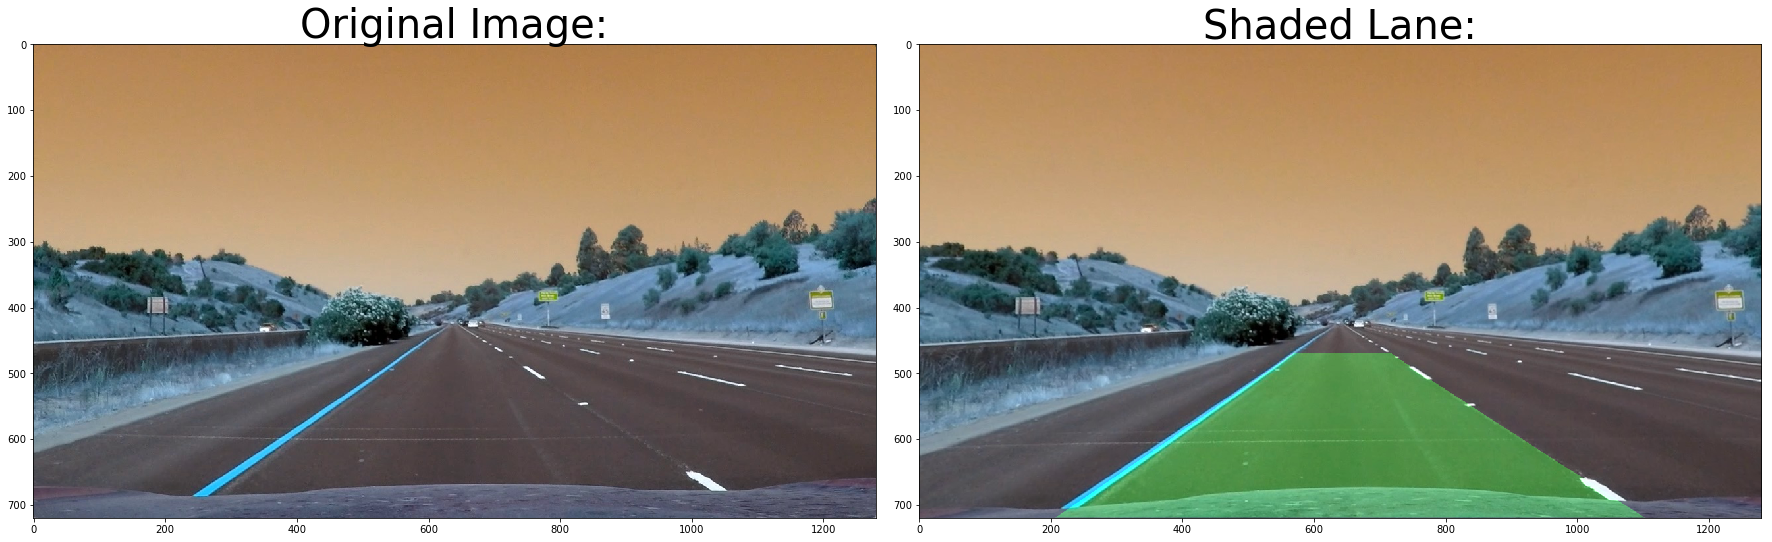

In [240]:
# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Displaying birds eye view in highway picture:
# Showing the original image before passing it through the function:
ax1.imshow(highway_test1)
ax1.set_title('Original Image:', fontsize=40)

# Saving the birds eye view image in a variable and folder:
plt.imsave('output_images/highway_shaded_test1.jpg', result)
print('Image saved in directory!')

# Showing the birds eye view image after passing it through the function:
ax2.imshow(result, cmap='gray')
ax2.set_title('Shaded Lane:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)